In [6]:
!pip install matplotlib 
!pip install pandas
!pip install Pillow

In [22]:
#write a python class for extraction and visualization

import matplotlib 
import pandas as pd
import PIL
import json
import matplotlib.image as pltimg
import matplotlib.pyplot as plt

In [ ]:
class Visualizer:
    
    keys = ["AP_WD", "AP_BEAM_TIME", "AP_IMAGE_PIXEL_SIZE", "AP_HOLDER_HEIGHT", "AP_BEAM_CURRENT", "AP_HOLDER_DIAMETER"]

    def __init__(self, json_path, image_path):
        self.json_path = json_path
        self.image_path = image_path
        


    def extract_features(self):
        with open(self.json_path, "r") as f:
            data = json.load(f)
        

        extracted_features = {}

        for k in self.keys:
            extracted_features[k] = data[k]

        return extracted_features 
    
    def show_image(self):
        image = pltimg.imread(self.image_path)
        plt.imshow(image)
        plt.show()

    def display_table(self):
        data_values = []
        features = self.extract_features()
        for k in self.keys:
            x = features[k]
            data_values.append(x)

        variables = []
        measures = []
        values = []

        for d in data_values:
            temp = d.split("=")
            variables.append(temp[0].strip())
            
            temp2 = temp[1].strip().split(" ")
            values.append(temp2[0])
            measures.append(temp2[1])

        dataframe = pd.DataFrame({
            "Variables" : variables,
            "Values": values,
            "Measures": measures
        })
            
        return dataframe 

        



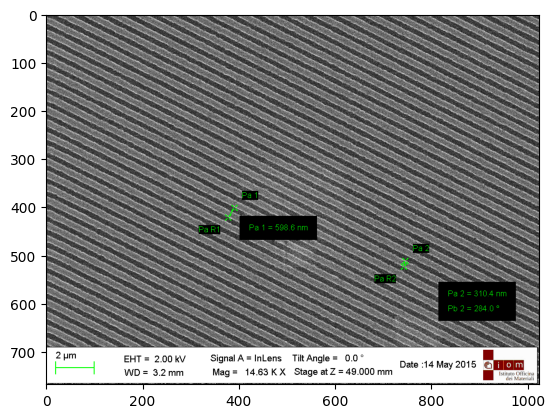

          Variables   Values Measures
0                WD    3.198       mm
1         Beam Time  4669.97    Hours
2  Image Pixel Size    25.09       nm
3     Holder Height   13.700       mm
4      Beam Current     80.0       µA
5   Holder Diameter   50.000       mm None


In [68]:
my_json = "/home/jzupp/exercises/git_directories/Advanced-Python-2025/04-Metadata-Extraction-and-Visualization/output/test.json"
vis = Visualizer(my_json, "/home/jzupp/exercises/git_directories/Advanced-Python-2025/04-Metadata-Extraction-and-Visualization/imgs/12_50_vero_09.tif")
print(vis.display_table(), vis.show_image())

In [69]:
%pwd

'/home/jzupp'